In [638]:
!curl -o ./dow_jones_index.data    https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Dow%20Jones%20Index/dow_jones_index.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88322  100 88322    0     0   578k      0 --:--:-- --:--:-- --:--:--  578k


In [639]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import itertools
sns.set()
df = pd.read_csv('/content/dow_jones_index.data')
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,2011-05-27,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,2011-06-03,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,2011-06-10,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,2011-06-17,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    object        
 4   high                                750 non-null    object        
 5   low                                 750 non-null    object        
 6   close                               750 non-null    object        
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

In [641]:
df.describe()

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000
mean,1.520000,1.175478e+08,0.050262,5.593627,1.173876e+08,0.238468,52.525333,0.691826
std,0.499933,1.584381e+08,2.517809,40.543478,1.592322e+08,2.679538,46.335098,0.305482
min,1.000000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,-15.422900,0.000000,0.065574
25%,1.000000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,-1.222067,24.000000,0.534549
50%,2.000000,5.306088e+07,0.000000,0.512586,5.294556e+07,0.101193,47.000000,0.681067
75%,2.000000,1.327218e+08,1.650888,21.800622,1.333230e+08,1.845562,69.000000,0.854291
max,2.000000,1.453439e+09,9.882230,327.408924,1.453439e+09,9.882230,336.000000,1.564210


In [642]:
def dollar_str_to_float(a):
  a = a.replace('$', '')
  return float(a)
for i in ['open',	'high', 'low', 'close', 'next_weeks_open',	'next_weeks_close'	]:	
  df[i] = df[i].apply(lambda x: dollar_str_to_float(x))

In [643]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,2011-05-27,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,2011-06-03,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,2011-06-10,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,2011-06-17,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

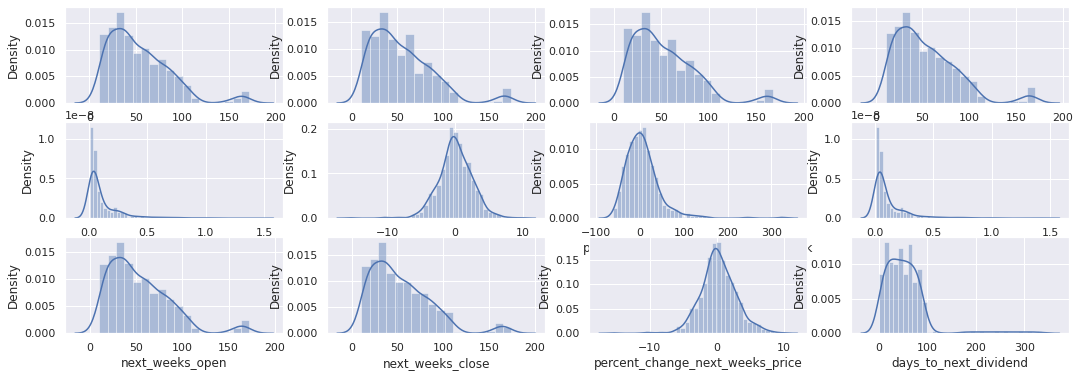

In [644]:

fig , ax = plt.subplots(3,4, figsize=(18,6))
k = 0
col = df.columns[3:]
for i in ax:
  for j in i:
    sns.distplot(df[col[k]], ax= j)
    k+=1

median imputation seems like a better option

In [645]:
df['weekly_RoR'] = (df['high'] - df['low']) /  df['low']


In [646]:
#OHE
for i in df['stock'].unique():
  df["is_"+ i] = df['stock'].apply(lambda x: 1 if x == i else 0)
df['week_no'] = df['date'].apply(lambda x : x.weekofyear)


In [647]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,weekly_RoR,is_AA,is_AXP,is_BA,is_BAC,is_CAT,is_CSCO,is_CVX,is_DD,is_DIS,is_GE,is_HD,is_HPQ,is_IBM,is_INTC,is_JNJ,is_JPM,is_KRFT,is_KO,is_MCD,is_MMM,is_MRK,is_MSFT,is_PFE,is_PG,is_T,is_TRV,is_UTX,is_VZ,is_WMT,is_XOM,week_no
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704,0.059569,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,0.068414,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,0.050000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,0.051201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,0.074784,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,2011-05-27,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,0.031972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21
746,2,XOM,2011-06-03,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,0.044525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22
747,2,XOM,2011-06-10,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,0.026969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23
748,2,XOM,2011-06-17,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,0.031789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24


In [648]:
train_df = df[df['quarter']== 1].copy()
train_df=train_df.reset_index()
test_df = df[df['quarter']== 2].copy()
test_df=test_df.reset_index()
test_df.drop('index', inplace=True, axis= 1)
train_df.drop('index', inplace=True, axis= 1)

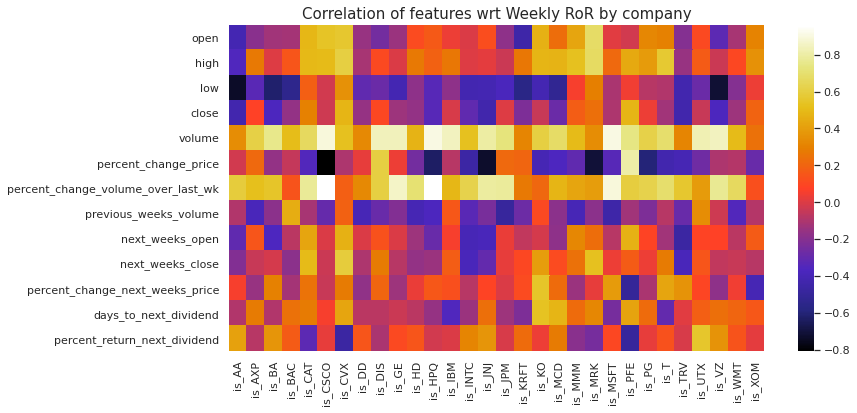

In [649]:
hmap = pd.DataFrame([])
for i in range(-31,-1,1):
  hmap =pd.concat([hmap, train_df[train_df.columns[1:-31]][train_df[train_df.columns[i]]==1].corr()['weekly_RoR']], axis = 1)
hmap.columns = train_df.columns[-31:-1]
hmap.drop('weekly_RoR', inplace=True, axis = 0)
plt.figure(figsize=(12,6));
sns.heatmap(hmap, cmap='CMRmap')
plt.title('Correlation of features wrt Weekly RoR by company', fontsize=15);

each company has a unique trend but generally volume is positively correlated with RoR

In [650]:
column_to_move = train_df.pop("week_no")
train_df.insert(0, "week_no", column_to_move)
column_to_move = train_df.pop("weekly_RoR")
train_df.insert(len(train_df.columns), "weekly_RoR", column_to_move)

column_to_move = test_df.pop("week_no")
test_df.insert(0, "week_no", column_to_move)
column_to_move = test_df.pop("weekly_RoR")
test_df.insert(len(test_df.columns), "weekly_RoR", column_to_move)

train_df.drop('quarter', inplace=True, axis =1)
test_df.drop('quarter', inplace=True, axis =1)

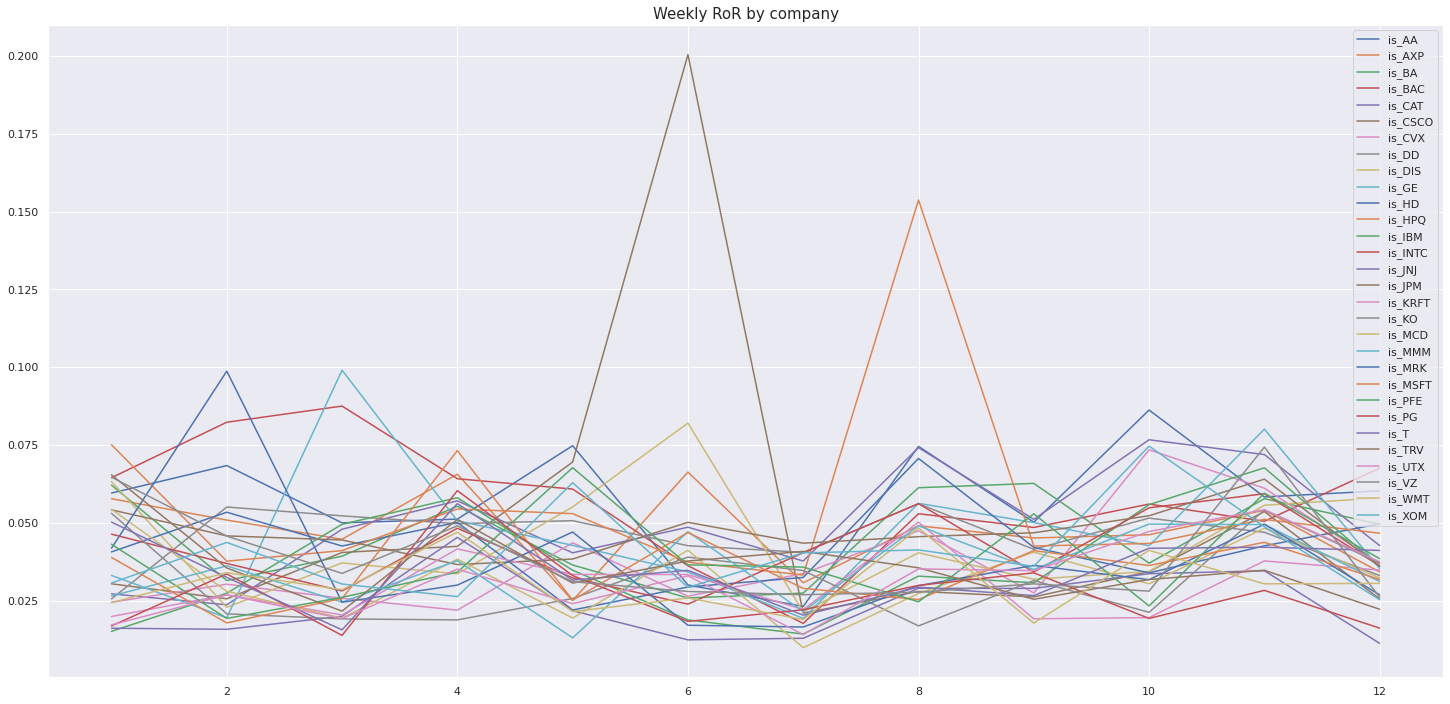

In [651]:
plt.figure(figsize=(25,12));
for i in range(-31,-1,1):
  plt.plot(train_df['week_no'][train_df[train_df.columns[i]]==1], train_df['weekly_RoR'][train_df[train_df.columns[i]]==1], label = train_df.columns[i])
plt.legend(loc = 'upper right')
plt.title('Weekly RoR by company', fontsize=15);

In [652]:
for i in train_df[train_df['percent_change_volume_over_last_wk'].isna()].index:
  train_df['percent_change_volume_over_last_wk'].iloc[i] =  train_df['percent_change_volume_over_last_wk'][train_df['stock']== train_df.iloc[i]['stock']].median()
for i in train_df[train_df['previous_weeks_volume'].isna()].index:
  train_df['previous_weeks_volume'].iloc[i] =  train_df['previous_weeks_volume'][train_df['stock']== train_df.iloc[i]['stock']].median()


train_df[train_df['percent_change_volume_over_last_wk'].isna()].index
train_df[train_df['previous_weeks_volume'].isna()].index
 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Int64Index([], dtype='int64')

In [653]:
for i in test_df[test_df['percent_change_volume_over_last_wk'].isna()].index:
  test_df['percent_change_volume_over_last_wk'].iloc[i] =  train_df['percent_change_volume_over_last_wk'][train_df['stock']== test_df.iloc[i]['stock']].median()
for i in test_df[test_df['previous_weeks_volume'].isna()].index:
  test_df['previous_weeks_volume'].iloc[i] =  train_df['previous_weeks_volume'][train_df['stock']== test_df.iloc[i]['stock']].median()


test_df[test_df['percent_change_volume_over_last_wk'].isna()].index
train_df[train_df['previous_weeks_volume'].isna()].index

Int64Index([], dtype='int64')

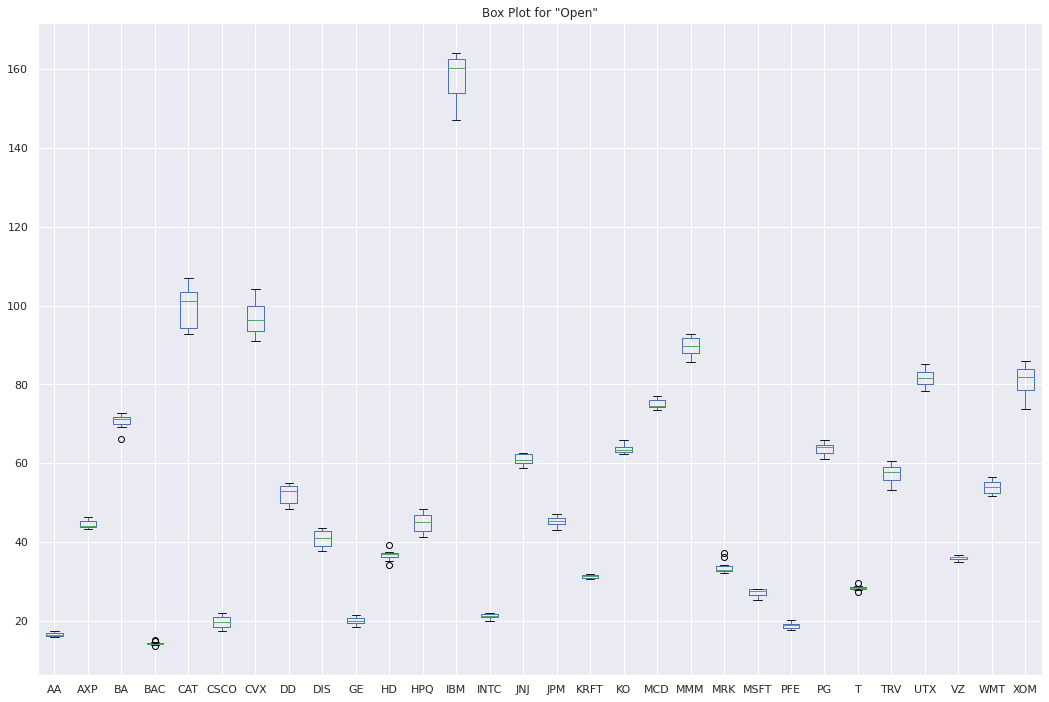

In [654]:
t = np.arange(0,12).reshape(-1,1)
for i in train_df['stock'].unique():
  t = np.concatenate([t, train_df['open'][train_df['stock']==i].values.reshape(-1,1)], axis =1)
t = pd.DataFrame(t)
t.drop(t.columns[0], inplace= True, axis= 1)
t.columns = train_df['stock'].unique()
t.plot(kind = 'box', figsize=(18,12) )
plt.title('Box Plot for "Open"');

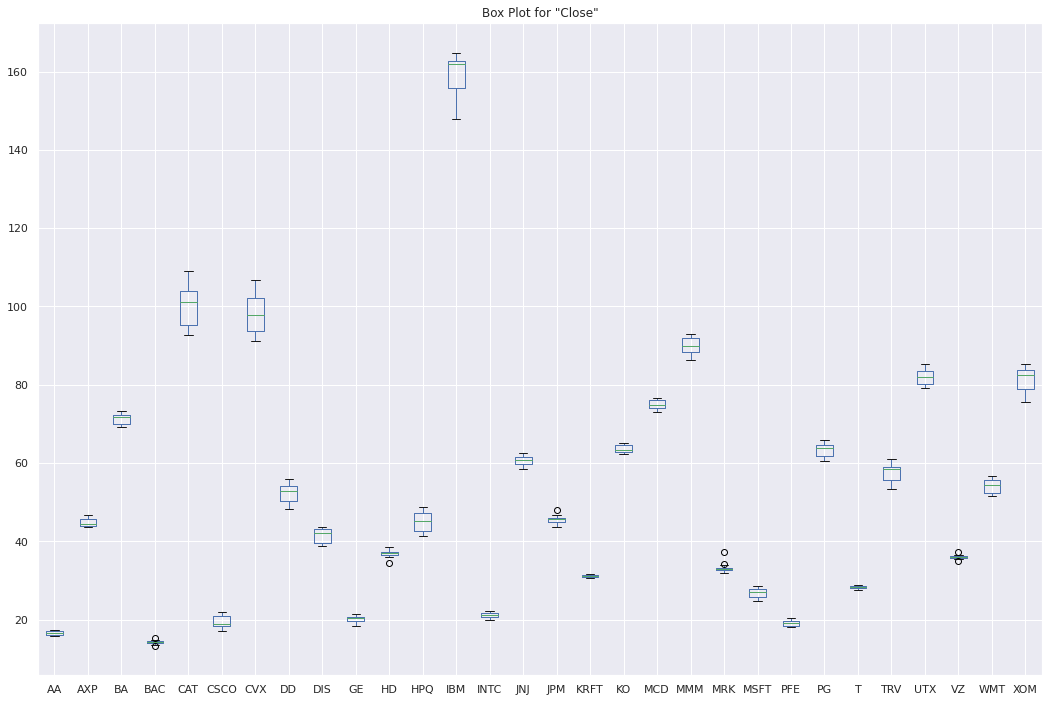

In [655]:
t = np.arange(0,12).reshape(-1,1)
for i in train_df['stock'].unique():
  t = np.concatenate([t, train_df['close'][train_df['stock']==i].values.reshape(-1,1)], axis =1)
t = pd.DataFrame(t)
t.drop(t.columns[0], inplace= True, axis= 1)
t.columns = train_df['stock'].unique()
t.plot(kind = 'box', figsize=(18,12) )
plt.title('Box Plot for "Close"');

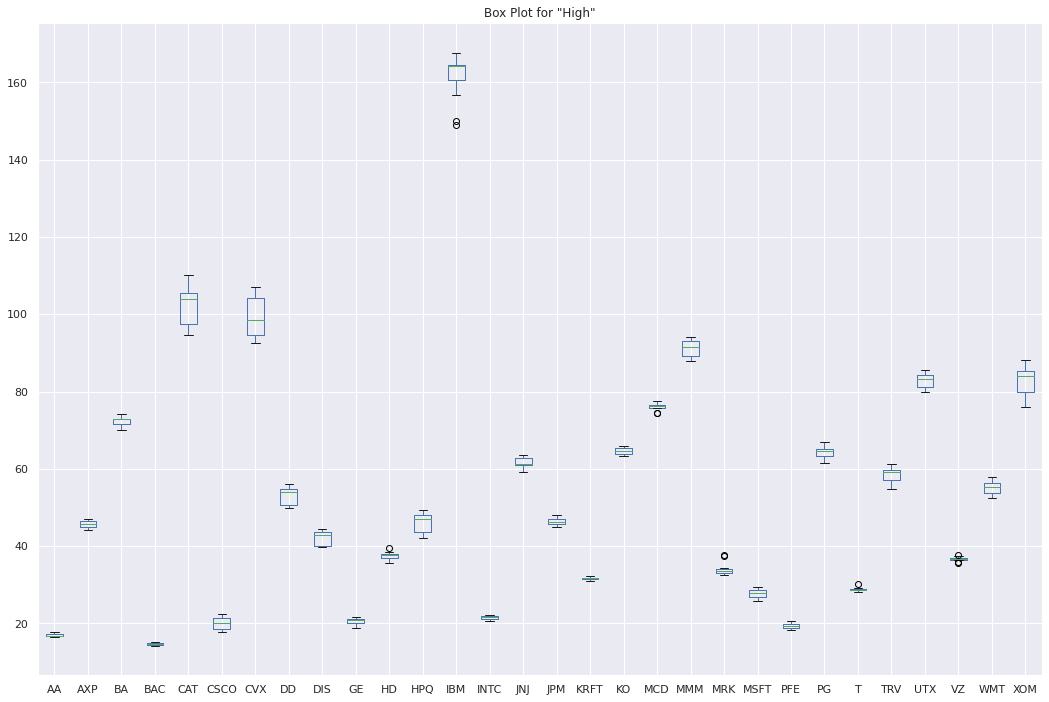

In [656]:
t = np.arange(0,12).reshape(-1,1)
for i in train_df['stock'].unique():
  t = np.concatenate([t, train_df['high'][train_df['stock']==i].values.reshape(-1,1)], axis =1)
t = pd.DataFrame(t)
t.drop(t.columns[0], inplace= True, axis= 1)
t.columns = train_df['stock'].unique()
t.plot(kind = 'box', figsize=(18,12) )
plt.title('Box Plot for "High"');

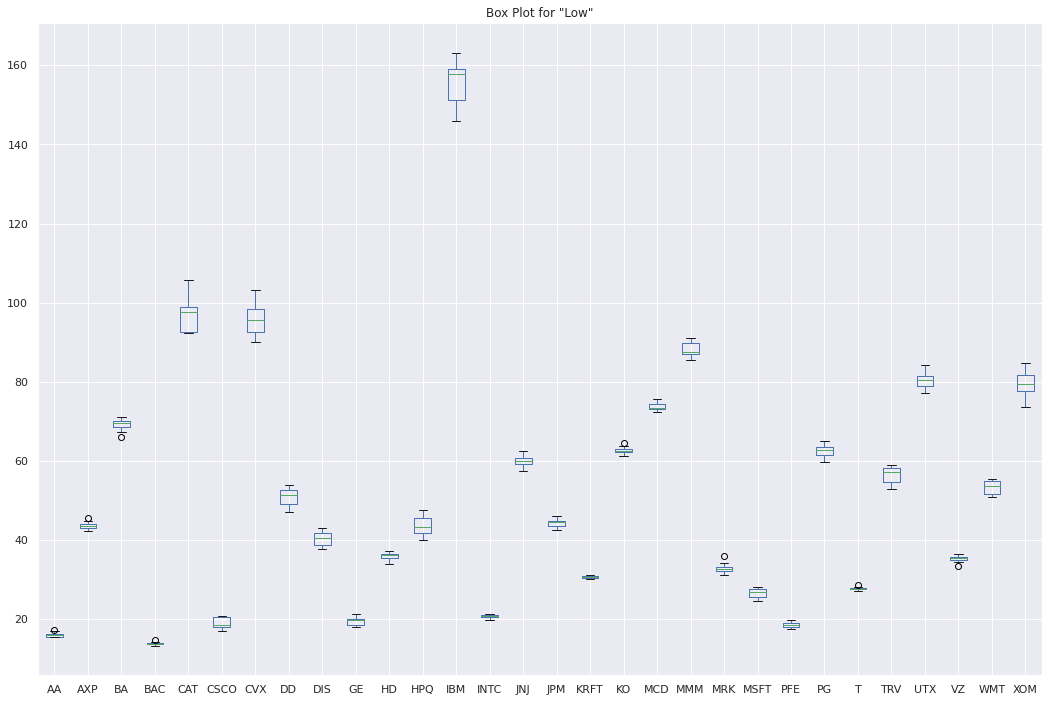

In [657]:
t = np.arange(0,12).reshape(-1,1)
for i in train_df['stock'].unique():
  t = np.concatenate([t, train_df['low'][train_df['stock']==i].values.reshape(-1,1)], axis =1)
t = pd.DataFrame(t)
t.drop(t.columns[0], inplace= True, axis= 1)
t.columns = train_df['stock'].unique()
t.plot(kind = 'box', figsize=(18,12) )
plt.title('Box Plot for "Low"');

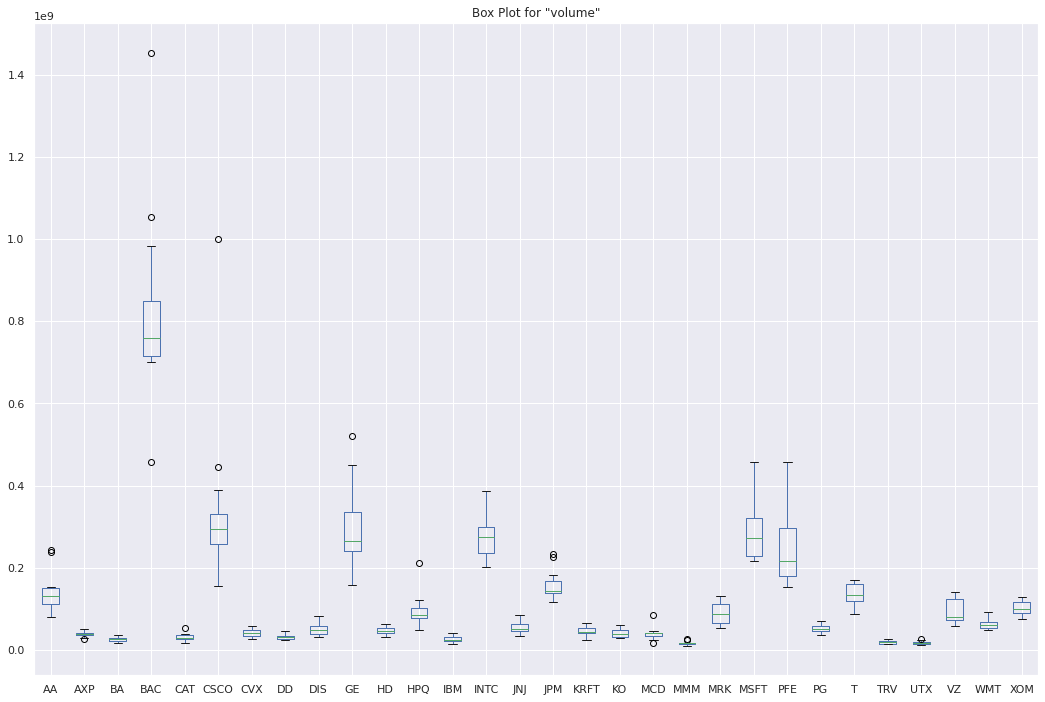

In [658]:
t = np.arange(0,12).reshape(-1,1)
for i in train_df['stock'].unique():
  t = np.concatenate([t, train_df['volume'][train_df['stock']==i].values.reshape(-1,1)], axis =1)
t = pd.DataFrame(t)
t.drop(t.columns[0], inplace= True, axis= 1)
t.columns = train_df['stock'].unique()
t.plot(kind = 'box', figsize=(18,12) )
plt.title('Box Plot for "volume"');

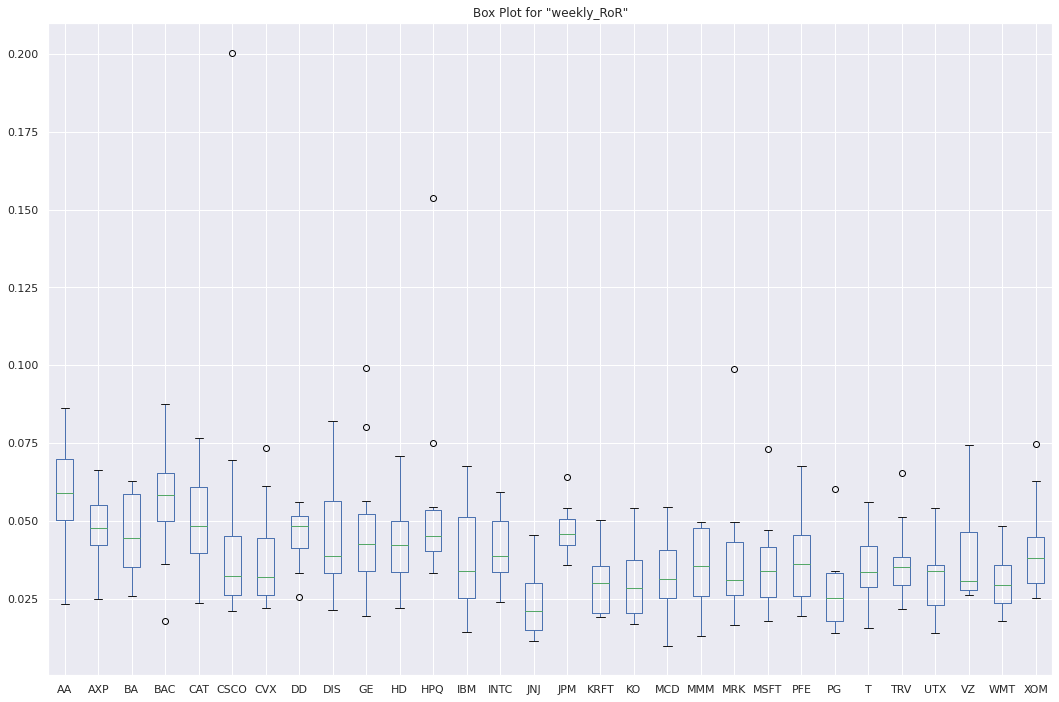

In [659]:
t = np.arange(0,12).reshape(-1,1)
for i in train_df['stock'].unique():
  t = np.concatenate([t, train_df['weekly_RoR'][train_df['stock']==i].values.reshape(-1,1)], axis =1)
t = pd.DataFrame(t)
t.drop(t.columns[0], inplace= True, axis= 1)
t.columns = train_df['stock'].unique()
t.plot(kind = 'box', figsize=(18,12) )
plt.title('Box Plot for "weekly_RoR"');

In [660]:
train_df.drop(['stock', 'date'], inplace=True, axis = 1)
test_df.drop(['stock', 'date'], inplace=True, axis = 1)

In [661]:
train_df

,week_no,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,is_AA,is_AXP,is_BA,is_BAC,is_CAT,is_CSCO,is_CVX,is_DD,is_DIS,is_GE,is_HD,is_HPQ,is_IBM,is_INTC,is_JNJ,is_JPM,is_KRFT,is_KO,is_MCD,is_MMM,is_MRK,is_MSFT,is_PFE,is_PG,is_T,is_TRV,is_UTX,is_VZ,is_WMT,is_XOM,weekly_RoR
0,1,15.82,16.72,15.78,16.42,239655616,3.792670,1.380223,132981863.0,16.71,15.97,-4.428490,26,0.182704,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.059569
1,2,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.068414
2,3,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050000
3,4,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.051201
4,5,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.074784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,84.97,88.23,84.73,85.34,122018405,0.435448,30.744892,93325562.0,85.87,85.08,-0.919995,3,0.515585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.041308
356,9,85.87,86.56,83.55,85.08,102134160,-0.919995,-16.296103,122018405.0,85.84,82.12,-4.333640,68,0.552421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.036026
357,10,85.84,86.08,80.10,82.12,92727886,-4.333640,-9.209724,102134160.0,81.67,80.85,-1.004040,61,0.572333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.074657
358,11,81.67,82.64,78.80,80.85,123914255,-1.004040,33.632136,92727886.0,81.87,83.62,2.137540,54,0.581323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.048731


In [662]:
from sklearn.preprocessing import StandardScaler
SC_X = StandardScaler()

In [663]:
train_df[train_df.columns[0:13]] = SC_X.fit_transform(train_df[train_df.columns[0:13]])
test_df[test_df.columns[0:13]] =  SC_X.transform(test_df[test_df.columns[0:13]])

In [664]:
train_df

,week_no,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,is_AA,is_AXP,is_BA,is_BAC,is_CAT,is_CSCO,is_CVX,is_DD,is_DIS,is_GE,is_HD,is_HPQ,is_IBM,is_INTC,is_JNJ,is_JPM,is_KRFT,is_KO,is_MCD,is_MMM,is_MRK,is_MSFT,is_PFE,is_PG,is_T,is_TRV,is_UTX,is_VZ,is_WMT,is_XOM,weekly_RoR
0,-1.593255,-1.178104,-1.157676,-1.165533,-1.154819,0.654059,1.379175,-0.060488,0.037233,-1.145423,-1.163414,-1.891152,-0.525491,0.182704,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.059569
1,-1.303572,-1.149730,-1.157988,-1.170061,-1.169035,0.672993,-1.832491,-0.060488,0.645851,-1.161842,-1.169034,-1.105984,-0.657995,0.187852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.068414
2,-1.013890,-1.166308,-1.168286,-1.171355,-1.174721,0.074623,-1.067648,-1.093002,0.664723,-1.171946,-1.158418,0.541877,-0.790498,0.189994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050000
3,-0.724207,-1.176510,-1.160484,-1.164239,-1.163980,0.148754,0.537556,0.124954,0.068308,-1.162158,-1.126885,2.264320,-0.923002,0.185989,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.051201
4,-0.434524,-1.166627,-1.136766,-1.152594,-1.132074,0.165976,2.215411,-0.046369,0.142197,-1.125846,-1.119704,-0.022585,0.818471,0.175029,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.074784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.434524,1.026469,1.073995,1.064681,1.022424,-0.019310,0.067648,0.622302,-0.189023,1.038328,0.994314,-0.484105,-0.960860,0.515585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.041308
356,0.724207,1.055162,1.021878,1.026514,1.014210,-0.133130,-0.461867,-0.471500,-0.025318,1.037381,0.901898,-1.853113,0.269529,0.552421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.036026
357,1.013890,1.054206,1.006899,0.914922,0.920701,-0.186973,-1.795437,-0.306727,-0.138766,0.905712,0.862246,-0.517811,0.137025,0.572333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.074657
358,1.303572,0.921262,0.899544,0.872873,0.880581,-0.008458,-0.494700,0.689437,-0.192433,0.912027,0.948730,0.742089,0.004522,0.581323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.048731


In [665]:
test_df

,week_no,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,is_AA,is_AXP,is_BA,is_BAC,is_CAT,is_CSCO,is_CVX,is_DD,is_DIS,is_GE,is_HD,is_HPQ,is_IBM,is_INTC,is_JNJ,is_JPM,is_KRFT,is_KO,is_MCD,is_MMM,is_MRK,is_MSFT,is_PFE,is_PG,is_T,is_TRV,is_UTX,is_VZ,is_WMT,is_XOM,weekly_RoR
0,1.882938,-1.136340,-1.123971,-1.125424,-1.121649,-0.126340,0.672923,0.096501,-0.176329,-1.123004,-1.102532,1.035939,-0.241556,0.171723,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.045828
1,2.172620,-1.127095,-1.103062,-1.112486,-1.107433,0.022010,1.018828,0.490669,-0.131998,-1.102796,-1.146242,-3.534871,-0.374059,0.167411,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.060276
2,2.462303,-1.106691,-1.111800,-1.146125,-1.151660,0.501829,-3.433659,1.415567,0.015867,-1.156474,-1.132192,1.380171,-0.506562,0.181598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.110501
3,2.751986,-1.160889,-1.149874,-1.162298,-1.137444,-0.229861,1.354150,-1.487588,0.494118,-1.138161,-1.131256,0.026894,-0.620137,0.176783,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.068640
4,3.041669,-1.142398,-1.141448,-1.137069,-1.136496,-0.197826,0.035904,0.060091,-0.235181,-1.127741,-1.126572,-0.393812,-0.771569,0.176471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.034814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,4.200400,0.875034,0.899232,0.913952,0.936812,-0.327197,1.071168,-0.589146,-0.226489,0.956548,0.872550,-1.126417,0.402032,0.568801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.031972
386,4.490082,0.972590,0.934184,0.917510,0.891006,-0.267749,-1.087552,0.261340,-0.332199,0.882346,0.828839,-0.685020,0.269529,0.578960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.044525
387,4.779765,0.897670,0.875514,0.902631,0.846778,-0.188959,-0.657582,0.314529,-0.272945,0.852981,0.805111,-0.606424,0.137025,0.589120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.026969
388,5.069448,0.868021,0.842745,0.857671,0.822769,-0.142362,-0.581020,0.112315,-0.194413,0.810354,0.735174,-1.068671,0.004522,0.594786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.031789


In [666]:
#Since the model splits thge dataset into quarters where each company has 12 datapoints DL models may not give a better edge, choice of models include linear regresion, svr, xgbregressor
#XGBRegressor is chosen out of preference of speed, along with GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
x_train = train_df.drop('weekly_RoR', axis = 1)
x_test = test_df.drop('weekly_RoR', axis = 1)
y_train = train_df['weekly_RoR']
y_test = test_df['weekly_RoR']


In [667]:
xgb1 = XGBRegressor(random_state=1)
parameters = {'nthread':[4], 
              'learning_rate': [ 0.05], 
              'max_depth': [15,20,25],
              'min_child_weight': [3,2,1],
              'silent': [1],
              'subsample': [0.7, 0.6],
              'colsample_bytree': [1],
              'n_estimators': [800,600],
              'objective':['reg:squarederror']
              
              }

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.7min finished


0.5693442634775426
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 600, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


In [668]:
y_predicted = xgb_grid.predict(x_test)

d = pd.DataFrame(y_predicted * 100 )
d = pd.concat([d, y_test* 100], axis = 1)
d.columns = ['Predicted','Actual']
d

,Predicted,Actual
0,5.082765,4.582844
1,6.182554,6.027555
2,13.147942,11.050061
3,5.361793,6.863980
4,5.276808,3.481393
...,...,...
385,3.949580,3.197202
386,5.418336,4.452482
387,4.949599,2.696939
388,4.590044,3.178859


In [669]:
from sklearn.metrics import  r2_score
r2_score( y_test, y_predicted)

0.16045434371426204

In [670]:
test_df[test_df.columns[0:13]] =  SC_X.inverse_transform(test_df[test_df.columns[0:13]])

In [671]:
test_df.insert(1, 'stock', df[df['quarter'] == 2]['stock'].values.reshape(-1,1))
test_df.insert(len(test_df.columns), 'Predicted weekly_RoR', y_predicted)

In [672]:
pred_col = test_df[['week_no','stock','Predicted weekly_RoR', 'weekly_RoR']]
pred_col

,week_no,stock,Predicted weekly_RoR,weekly_RoR
0,13.0,AA,0.050828,0.045828
1,14.0,AA,0.061826,0.060276
2,15.0,AA,0.131479,0.110501
3,16.0,AA,0.053618,0.068640
4,17.0,AA,0.052768,0.034814
...,...,...,...,...
385,21.0,XOM,0.039496,0.031972
386,22.0,XOM,0.054183,0.044525
387,23.0,XOM,0.049496,0.026969
388,24.0,XOM,0.045900,0.031789


In [675]:
def get_stock(week_no, df, col_name):
  week_group = df[df['week_no'] == week_no]
  index_ = week_group[week_group[col_name]==week_group[col_name].max()].index
  return df.iloc[index_]['stock'].values

suggested_stock['week_no'] = pd.DataFrame(pred_col['week_no'].unique())
#suggested_stock.drop(suggested_stock.columns[0], axis =1, inplace= True)
suggested_stock["Actual_Stock_with_greatest_RoR"] = suggested_stock['week_no'].apply(lambda x :get_stock(x, pred_col, 'weekly_RoR') )
suggested_stock["Predicted_Stock_with_greatest_RoR"] = suggested_stock['week_no'].apply(lambda x :get_stock(x, pred_col, 'Predicted weekly_RoR'))
suggested_stock

,Actual_Stock_with_greatest_RoR,Predicted_Stock_with_greatest_RoR,week_no
0,[HPQ],[T],13.0
1,[CSCO],[CAT],14.0
2,[AA],[AA],15.0
3,[INTC],[INTC],16.0
4,[INTC],[CAT],17.0
5,[CVX],[CVX],18.0
6,[CSCO],[CSCO],19.0
7,[HPQ],[HPQ],20.0
8,[HPQ],[HPQ],21.0
9,[PG],[AA],22.0
